## Data Mining Lab <br/>
### Lab2<br/>
#### Name: Samarth Garg
#### Roll No: 2020IMT-085<br/>
Date: 22/08/2023

In [96]:
import pandas as pd

df = pd.read_csv("./data.csv")
df.head()

,Roll,PI_Assign,PI_Lab,PI_Thr,PI_Cont,PI_LT,PI_quiz,PII_Assign1,PII_Assign2,PII_Thr,...,PII_Thr2,PII_Cont1,PII_Cont2,PII_Cont3,PIII_1,PIII_2,PIII_3,PIII_4,PIII_5,PIII_6
0,imt_2020145,15,5,1.375,12.46,0,4.250,10,5,0,...,0.5,3.0,1,8,0.0,0.00,1.25,3.33,0.458333,5
1,imt_2020128,0,0,0.720,11.60,0,-2.000,15,5,0,...,0.5,2.5,1,7,0.0,0.00,0.00,3.84,1.083333,-15
2,imt_2020062,15,10,3.330,18.20,0,5.500,20,5,0,...,1.5,5.5,1,9,0.0,1.00,0.75,2.68,1.783333,10
3,imt_2020016,0,0,1.720,16.32,0,4.500,0,0,0,...,0.0,3.5,1,9,0.0,0.00,0.50,2.87,0.541666,0
4,imt_2020114,20,0,1.670,12.23,4,1.625,14,5,0,...,0.0,5.5,1,8,0.0,0.25,0.75,3.95,0.541666,10


In [97]:
df.describe()

,PI_Assign,PI_Lab,PI_Thr,PI_Cont,PI_LT,PI_quiz,PII_Assign1,PII_Assign2,PII_Thr,PII_LT,...,PII_Thr2,PII_Cont1,PII_Cont2,PII_Cont3,PIII_1,PIII_2,PIII_3,PIII_4,PIII_5,PIII_6
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,11.152727,3.258182,1.632600,17.250145,0.916364,2.725909,12.563636,6.265455,0.538182,4.738182,...,0.321818,5.146545,0.865455,8.072727,0.161818,0.029455,0.420000,3.332364,0.919448,9.112727
std,8.161147,4.548469,1.156105,4.208298,2.451780,2.832787,9.252665,6.180267,1.736627,2.357740,...,0.817842,1.629534,0.341860,1.858641,0.696836,0.959140,0.767413,0.923337,0.683202,8.635672
min,0.000000,0.000000,-3.000000,0.000000,0.000000,-2.000000,-10.000000,-15.000000,0.000000,-5.000000,...,-2.000000,0.000000,0.000000,0.000000,-3.000000,-3.000000,-2.500000,0.000000,0.000000,-15.000000
25%,3.500000,0.000000,1.000000,14.415000,0.000000,1.500000,5.000000,5.000000,0.000000,5.000000,...,0.000000,4.500000,1.000000,8.000000,0.000000,0.000000,0.000000,2.890000,0.458333,5.000000
50%,10.000000,0.000000,1.670000,17.790000,0.000000,3.500000,18.000000,5.000000,0.000000,5.000000,...,0.000000,5.500000,1.000000,8.000000,0.000000,0.000000,0.250000,3.250000,0.741667,10.000000
75%,20.000000,5.000000,2.330000,20.130000,0.000000,4.687500,20.000000,5.000000,0.000000,5.000000,...,1.000000,6.000000,1.000000,9.000000,0.000000,0.500000,0.750000,3.845000,1.291666,10.000000
max,20.000000,15.000000,4.920000,28.060000,14.000000,7.500000,20.000000,25.000000,10.000000,10.000000,...,2.500000,8.000000,1.000000,10.000000,4.000000,2.350000,3.500000,6.000000,4.250001,30.000000


In [98]:
# ques1
correlation = df.corr(method='pearson')
sorted_corr_matrix = correlation.unstack().sort_values(ascending=False)
sorted_corr_matrix[sorted_corr_matrix != 1.0][:10]

PIII_6       PI_Assign      0.596574
PI_Assign    PIII_6         0.596574
             PII_Assign1    0.591353
PII_Assign1  PI_Assign      0.591353
PIII_6       PI_Lab         0.570315
PI_Lab       PIII_6         0.570315
PI_LT        PI_Lab         0.538007
PI_Lab       PI_LT          0.538007
             PI_Assign      0.532112
PI_Assign    PI_Lab         0.532112
dtype: float64

In [99]:
'''
2. Find all pairs of columns that are statistically similar. Find all pairs of columns that are
statistically different. Define the threshold to a suitable value.
'''

df_dummy = df.copy()
df_dummy = df[df.columns[1:]]

from scipy.stats import ttest_ind
import numpy as np

similarity, different = [], []

def apply_ttest(a, b):
    t, p =  ttest_ind(a, b)
    return p

def is_similar(df):
    for i in range(len(df.columns)-1):
        for j in range(i+1, len(df.columns)):
            p = apply_ttest(df.iloc[:, i], df.iloc[:, j])
            if p>= 0.05:
                similarity.append((df.columns[i], df.columns[j]))
            else:
                different.append((df.columns[i], df.columns[j]))
    return similarity, different

is_similar(df_dummy)

([('PI_Assign', 'PII_Assign1'),
  ('PI_Lab', 'PI_quiz'),
  ('PI_Lab', 'PIII_4'),
  ('PI_LT', 'PII_Cont2'),
  ('PI_LT', 'PIII_5'),
  ('PII_Thr', 'PII_Thr2'),
  ('PII_Thr', 'PIII_3'),
  ('PII_LT', 'PII_Thr1'),
  ('PII_Thr2', 'PIII_3'),
  ('PII_Cont2', 'PIII_5'),
  ('PII_Cont3', 'PIII_6'),
  ('PIII_1', 'PIII_2')],
 [('PI_Assign', 'PI_Lab'),
  ('PI_Assign', 'PI_Thr'),
  ('PI_Assign', 'PI_Cont'),
  ('PI_Assign', 'PI_LT'),
  ('PI_Assign', 'PI_quiz'),
  ('PI_Assign', 'PII_Assign2'),
  ('PI_Assign', 'PII_Thr'),
  ('PI_Assign', 'PII_LT'),
  ('PI_Assign', 'PII_Thr1'),
  ('PI_Assign', 'PII_Thr2'),
  ('PI_Assign', 'PII_Cont1'),
  ('PI_Assign', 'PII_Cont2'),
  ('PI_Assign', 'PII_Cont3'),
  ('PI_Assign', 'PIII_1'),
  ('PI_Assign', 'PIII_2'),
  ('PI_Assign', 'PIII_3'),
  ('PI_Assign', 'PIII_4'),
  ('PI_Assign', 'PIII_5'),
  ('PI_Assign', 'PIII_6'),
  ('PI_Lab', 'PI_Thr'),
  ('PI_Lab', 'PI_Cont'),
  ('PI_Lab', 'PI_LT'),
  ('PI_Lab', 'PII_Assign1'),
  ('PI_Lab', 'PII_Assign2'),
  ('PI_Lab', 'PII_Thr'),

In [100]:
'''
3. Print all details of all students between roll number <prefix>100 and <prefix>150, where
<prefix> is img_2020 or imt_2020.
'''

roll_no = df['Roll']
def filter_batch(example, st):
    if example['Roll'][:3] == st:
        return int(example['Roll'][-3:])
    else:
        return np.nan

df['Roll_imt'] = df.apply(lambda x: filter_batch(x, 'imt'), axis=1)
df['Roll_img'] = df.apply(lambda x: filter_batch(x, 'img'), axis=1)

ans = df[(df['Roll_imt'] >= 100) & (df['Roll_imt'] <= 150) | (df['Roll_img'] >= 100) & (df['Roll_img'] <= 150)]
print('Total number of students: ', len(ans))
ans.head()

Total number of students:  77


,Roll,PI_Assign,PI_Lab,PI_Thr,PI_Cont,PI_LT,PI_quiz,PII_Assign1,PII_Assign2,PII_Thr,...,PII_Cont2,PII_Cont3,PIII_1,PIII_2,PIII_3,PIII_4,PIII_5,PIII_6,Roll_imt,Roll_img
0,imt_2020145,15,5,1.375,12.46,0,4.250,10,5,0,...,1,8,0.0,0.00,1.25,3.33,0.458333,5,145.0,NaN
1,imt_2020128,0,0,0.720,11.60,0,-2.000,15,5,0,...,1,7,0.0,0.00,0.00,3.84,1.083333,-15,128.0,NaN
4,imt_2020114,20,0,1.670,12.23,4,1.625,14,5,0,...,1,8,0.0,0.25,0.75,3.95,0.541666,10,114.0,NaN
11,imt_2020137,15,10,2.400,17.59,0,3.875,20,5,4,...,1,9,0.0,0.50,0.75,3.18,1.550000,20,137.0,NaN
15,imt_2020120,0,0,0.400,17.50,0,4.875,10,5,0,...,1,8,0.0,0.00,0.50,3.75,0.250000,10,120.0,NaN


In [101]:
# ques 4
'''
4. Print details of 1st five columns of all IMT students.
'''

df[df['Roll_img']!=np.nan].iloc[:, :5].head()

,Roll,PI_Assign,PI_Lab,PI_Thr,PI_Cont
0,imt_2020145,15,5,1.375,12.46
1,imt_2020128,0,0,0.720,11.60
2,imt_2020062,15,10,3.330,18.20
3,imt_2020016,0,0,1.720,16.32
4,imt_2020114,20,0,1.670,12.23


In [102]:
# ques5
'''
5. Print the list of roll numbers with at least one negative mark in the evaluation.
'''

valid_columns = df.columns[(df.columns!= 'Roll') & (df.columns!= 'Roll_imt') & (df.columns!= 'Roll_img') & (df.columns!= 'negative_marks')]
df['negative_marks'] = df[valid_columns].apply(lambda x: x[x<0].count(), axis=1)
df[df['negative_marks']>0]['Roll'].values

array(['imt_2020128', 'imt_2020004', 'imt_2020019', 'img_2020098',
       'img_2020122', 'img_2020051', 'img_2020079', 'imt_2020032',
       'img_2020106', 'img_2020097', 'imt_2020047', 'img_2020027',
       'img_2020035', 'imt_2020065', 'imt_2020118', 'img_2020077',
       'imt_2020053', 'img_2020030', 'img_2020021', 'img_2020089',
       'img_2020054', 'imt_2020144', 'img_2020074', 'imt_2020080',
       'img_2020050', 'imt_2020131', 'imt_2020085', 'imt_2020040',
       'img_2020058', 'img_2020026', 'imt_2020082', 'img_2020036',
       'imt_2020117', 'img_2020114', 'imt_2020048', 'imt_2020043',
       'img_2020022', 'img_2020063', 'imt_2020105', 'imt_2020111',
       'img_2020111', 'imt_2020101', 'imt_2020132', 'imt_2020079',
       'imt_2020138', 'imt_2020073', 'img_2020117', 'img_2020121',
       'img_2020091', 'img_2020055', 'imt_2020129', 'img_2020007',
       'img_2020102', 'imt_2020119', 'img_2020056', 'img_2020062',
       'imt_2020142', 'img_2020014', 'img_2020010', 'img_20201

In [103]:
# ques 6
'''
6. Print the list of roll numbers with positive marks in all evaluations.
'''

print('Total no. of students with positive marks in all evaluations: ', len(df[df['negative_marks'] == 0]))

df[df['negative_marks'] == 0]['Roll'].values


Total no. of students with positive marks in all evaluations:  172


array(['imt_2020145', 'imt_2020062', 'imt_2020016', 'imt_2020114',
       'imt_2020066', 'img_2020042', 'img_2020016', 'imt_2020044',
       'imt_2020097', 'imt_2020137', 'img_2020034', 'img_2020017',
       'imt_2020120', 'imt_2020027', 'img_2020048', 'imt_2020133',
       'imt_2020113', 'imt_2020031', 'imt_2020134', 'img_2020119',
       'imt_2020102', 'imt_2020025', 'imt_2020096', 'imt_2020121',
       'img_2020093', 'imt_2020147', 'imt_2020026', 'imt_2020011',
       'img_2020061', 'imt_2020140', 'imt_2020059', 'img_2020008',
       'imt_2020078', 'img_2020005', 'imt_2020112', 'imt_2020014',
       'imt_2020064', 'img_2020078', 'img_2020018', 'imt_2020008',
       'imt_2020046', 'img_2020006', 'imt_2020058', 'img_2020105',
       'imt_2020034', 'img_2020123', 'img_2020113', 'img_2020037',
       'imt_2020143', 'img_2020103', 'img_2020088', 'img_2020039',
       'img_2020028', 'imt_2020110', 'img_2020108', 'img_2020082',
       'img_2020095', 'img_2020029', 'img_2020101', 'imt_20200

In [104]:
# ques 7
'''
7. Replace all negative marks with zeros.
'''

df[valid_columns] = df[valid_columns].apply(lambda x: x.clip(lower=0))
df.head()

,Roll,PI_Assign,PI_Lab,PI_Thr,PI_Cont,PI_LT,PI_quiz,PII_Assign1,PII_Assign2,PII_Thr,...,PII_Cont3,PIII_1,PIII_2,PIII_3,PIII_4,PIII_5,PIII_6,Roll_imt,Roll_img,negative_marks
0,imt_2020145,15,5,1.375,12.46,0,4.250,10,5,0,...,8,0.0,0.00,1.25,3.33,0.458333,5,145.0,NaN,0
1,imt_2020128,0,0,0.720,11.60,0,0.000,15,5,0,...,7,0.0,0.00,0.00,3.84,1.083333,0,128.0,NaN,2
2,imt_2020062,15,10,3.330,18.20,0,5.500,20,5,0,...,9,0.0,1.00,0.75,2.68,1.783333,10,62.0,NaN,0
3,imt_2020016,0,0,1.720,16.32,0,4.500,0,0,0,...,9,0.0,0.00,0.50,2.87,0.541666,0,16.0,NaN,0
4,imt_2020114,20,0,1.670,12.23,4,1.625,14,5,0,...,8,0.0,0.25,0.75,3.95,0.541666,10,114.0,NaN,0


In [112]:
# ques 8
'''
8. Use a max-min normalization to normalize all marks between 0 and 1, and add the marks
to add a total column. Print the roll numbers of all students in the top 10% percentile and
the bottom 10% percentile.
'''

def normalize(x):
    return (x - x.min())/(x.max() - x.min())

df[valid_columns] = df[valid_columns].apply(lambda x: normalize(x))
df['total'] = df[valid_columns].apply(lambda x: x.sum(), axis=1)

print('Roll numbers of students in top 10% percentile: ', df[df['total'] >= df['total'].quantile(0.9)]['Roll'].values)
print('Roll numbers of students in bottom 10% percentile: ', df[df['total'] <= df['total'].quantile(0.1)]['Roll'].values)

Roll numbers of students in top 10% percentile:  ['imt_2020066' 'img_2020119' 'imt_2020143' 'img_2020039' 'img_2020029'
 'imt_2020041' 'img_2020025' 'img_2020076' 'imt_2020074' 'imt_2020083'
 'img_2020065' 'imt_2020052' 'img_2020114' 'imt_2020092' 'imt_2020138'
 'img_2020056' 'imt_2020070' 'img_2020013' 'imt_2020009' 'imt_2020149'
 'img_2020090' 'imt_2020086' 'imt_2020122' 'img_2020023' 'imt_2020021'
 'imt_2020087' 'imt_2020123' 'imt_2020023']
Roll numbers of students in bottom 10% percentile:  ['img_2020017' 'imt_2020019' 'imt_2020032' 'img_2020027' 'img_2020089'
 'img_2020054' 'imt_2020144' 'img_2020074' 'img_2020058' 'img_2020075'
 'imt_2020105' 'img_2020111' 'imt_2020049' 'imt_2020073' 'imt_2020127'
 'img_2020121' 'img_2020055' 'imt_2020142' 'imt_2020139' 'imt_2020030'
 'img_2020040' 'imt_2020035' 'imt_2020057' 'imt_2020135' 'imt_2020012'
 'img_2020060' 'img_2020094' 'img_2020107']


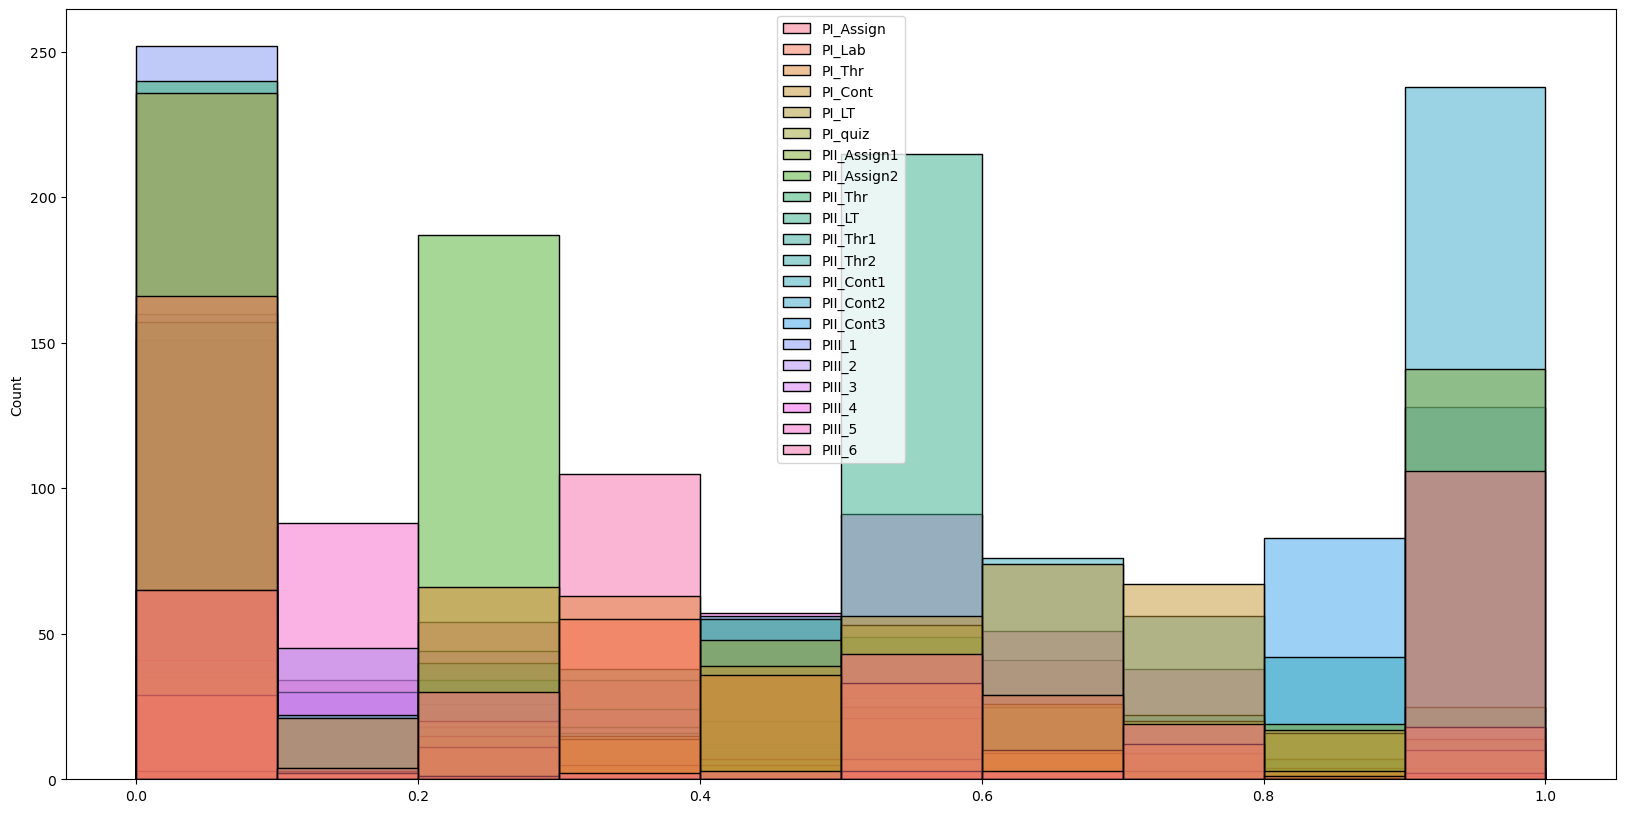

In [114]:
# ques 9
'''
9. Plot a histogram of marks of all columns.
'''

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.histplot(data=df[valid_columns], bins=10, kde=False)
plt.show()

In [121]:
# Ques 10
'''
10. Consider a new table (or amend the old one) with only those columns with a wide
distribution of marks as per the histogram. In the new table, find students at the top k
percentile of the first column and simultaneously the bottom k percentile of either of the
remaining columns. Also, find students at the top k percentile of any column and
simultaneously the bottom k percentile of either of the remaining columns.
'''
data = pd.read_csv("./data.csv")

import pandas as pd
import numpy as np
mark_columns = [col for col in data.columns if 'Roll' not in col]


columns_with_wide_distribution = []
for column in mark_columns:
    hist, _ = np.histogram(data[column], bins=20)
    if max(hist) > 20:  
        columns_with_wide_distribution.append(column)

new_table = data[columns_with_wide_distribution]

k = 10

top_k_percentile_first_column = new_table[new_table[columns_with_wide_distribution[0]] >= new_table[columns_with_wide_distribution[0]].quantile(1 - k / 100)]

bottom_k_percentile_remaining_columns = new_table[new_table[columns_with_wide_distribution[1:]].apply(lambda row: any(row <= row.quantile(k / 100)), axis=1)]

top_k_percentile_any_column = new_table[new_table[columns_with_wide_distribution].apply(lambda row: any(row >= row.quantile(1 - k / 100)), axis=1)]

bottom_k_percentile_any_column = new_table[new_table[columns_with_wide_distribution[1:]].apply(lambda row: any(row <= row.quantile(k / 100)), axis=1)]

print("Students in the top k percentile of the first column:")
print(top_k_percentile_first_column.head())

print("\nStudents in the bottom k percentile of any of the remaining columns:")
print(bottom_k_percentile_remaining_columns.head())

print("\nStudents in the top k percentile of any column:")
print(top_k_percentile_any_column.head())

print("\nStudents in the bottom k percentile of either of the remaining columns:")
print(bottom_k_percentile_any_column.head())


Students in the top k percentile of the first column:
    PI_Assign  PI_Lab  PI_Thr  PI_Cont  PI_LT  PI_quiz  PII_Assign1  \
4          20       0   1.670    12.23      4    1.625           14   
5          20       5   2.450    19.58      7    5.625           20   
7          20       5   1.800    16.16      7    2.500           20   
10         20       5   1.750    19.12      3    5.750           20   
12         20      10   1.575    17.79      0    3.000           20   

    PII_Assign2  PII_Thr  PII_LT  ...  PII_Thr2  PII_Cont1  PII_Cont2  \
4             5        0       5  ...       0.0       5.50          1   
5            15        0       9  ...       2.0       1.66          1   
7             5        0       5  ...       0.0       7.00          1   
10            5        0       5  ...       0.0       6.00          1   
12            5        2       5  ...       1.5       4.83          1   

    PII_Cont3  PIII_1  PIII_2  PIII_3  PIII_4    PIII_5  PIII_6  
4           8 